#### importing important libraries

In [2]:
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense,Dropout 
from keras.regularizers import  L1,L2
import cv2

#### creating a function to draw datapoints on the image with mouse click 

In [36]:
dataset=[]
# function to be given to mouse callback 
def draw(event,x,y,flag,param):
    if event==cv2.EVENT_FLAG_LBUTTON:
        dataset.append((x,y,0))
        cv2.circle(img,(x,y),4,(255,0,0),-1)
    elif event==cv2.EVENT_FLAG_RBUTTON:
        dataset.append((x,y,1))
        cv2.circle(img,(x,y),4,(0,0,255),-1)
        

In [37]:
img=np.full((255,255,3),255,np.uint8)
cv2.namedWindow("window name",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("window name",draw)

while True:
    cv2.imshow("window name",img)
    if cv2.waitKey(1)&255==ord("c"):
        break 
cv2.destroyAllWindows()

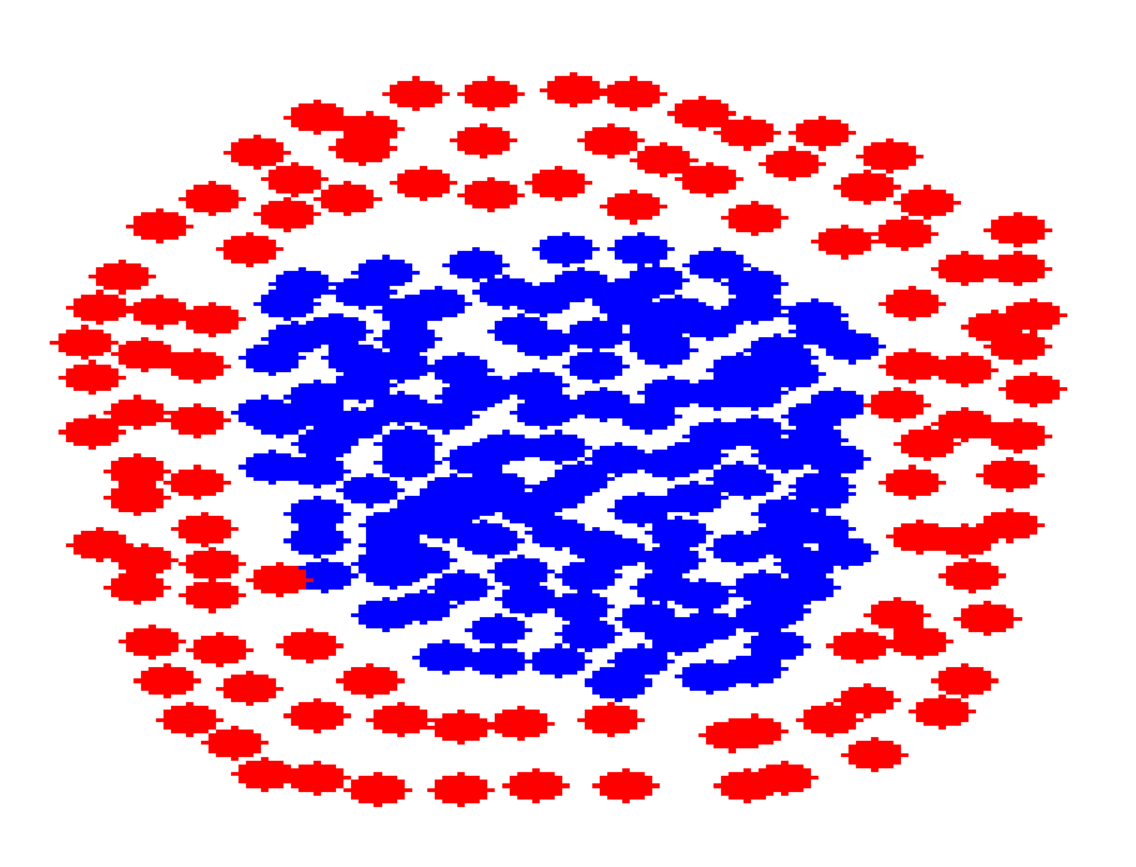

In [6]:
from IPython.display import Image
Image(r"C:\Users\ibteda azeem\Pictures\Screenshots\Screenshot 2023-10-19 192744.png",width=800,height=500) 

In [38]:
len(dataset) 

245

In [39]:
data=pd.DataFrame(dataset)

In [40]:
data.head()

,0,1,2
0,96,75,0
1,107,72,0
2,114,80,0
3,125,87,0
4,123,77,0


In [43]:
data.iloc[:,2].value_counts()

2
0    140
1    105
Name: count, dtype: int64

#### saving the data to a csv file 

In [44]:
#data.to_csv("concentric_circle.csv",index=False)

#### reading the data 

In [96]:
df=pd.read_csv("concentric_circle.csv")
df.head()

,0,1,2
0,96,75,0
1,107,72,0
2,114,80,0
3,125,87,0
4,123,77,0


In [98]:
df.iloc[:,2].value_counts()

2
0    140
1    105
Name: count, dtype: int64

#### splitting into input and output features

In [99]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

#### splitting the data into train and test  and scaling the input features 

In [100]:
#splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

#transforming x_train and x_test
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

#### creating the logical structures

In [101]:
model=Sequential()
model.add(Dense(8,activation="relu",input_dim=2))#input_dim only for first hidden layer
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [102]:
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 24        
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### compiling the model 

In [104]:
from keras.optimizers import SGD 

In [105]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=10,epochs=500,validation_split=0.1)

Epoch 1/500
20/20 [==============================] - 1s 17ms/step - loss: 0.6828 - accuracy: 0.4242 - val_loss: 0.6857 - val_accuracy: 0.5909
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6771 - accuracy: 0.4747 - val_loss: 0.6807 - val_accuracy: 0.5909
Epoch 3/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6722 - accuracy: 0.5152 - val_loss: 0.6767 - val_accuracy: 0.5909
Epoch 4/500
20/20 [==============================] - 0s 6ms/step - loss: 0.6683 - accuracy: 0.5404 - val_loss: 0.6733 - val_accuracy: 0.5455
Epoch 5/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6650 - accuracy: 0.5960 - val_loss: 0.6703 - val_accuracy: 0.5909
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6619 - accuracy: 0.6465 - val_loss: 0.6677 - val_accuracy: 0.6364
Epoch 7/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6594 - accuracy: 0.6667 - val_loss: 0.6652 - val_accuracy: 0.6364
Epoch 8/500


Epoch 59/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5718 - accuracy: 0.7626 - val_loss: 0.5798 - val_accuracy: 0.7273
Epoch 60/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5697 - accuracy: 0.7525 - val_loss: 0.5785 - val_accuracy: 0.7273
Epoch 61/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5682 - accuracy: 0.7626 - val_loss: 0.5772 - val_accuracy: 0.7273
Epoch 62/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5667 - accuracy: 0.7626 - val_loss: 0.5759 - val_accuracy: 0.7273
Epoch 63/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5649 - accuracy: 0.7626 - val_loss: 0.5745 - val_accuracy: 0.7273
Epoch 64/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5633 - accuracy: 0.7576 - val_loss: 0.5731 - val_accuracy: 0.7273
Epoch 65/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5616 - accuracy: 0.7576 - val_loss: 0.5718 - val_accuracy: 0.7273
Epoch 

20/20 [==============================] - 0s 8ms/step - loss: 0.2539 - accuracy: 0.9444 - val_loss: 0.3128 - val_accuracy: 0.9091
Epoch 174/500
20/20 [==============================] - 0s 5ms/step - loss: 0.2516 - accuracy: 0.9545 - val_loss: 0.3111 - val_accuracy: 0.9091
Epoch 175/500
20/20 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.9596 - val_loss: 0.3101 - val_accuracy: 0.9091
Epoch 176/500
20/20 [==============================] - 0s 5ms/step - loss: 0.2468 - accuracy: 0.9646 - val_loss: 0.3098 - val_accuracy: 0.8636
Epoch 177/500
20/20 [==============================] - 0s 5ms/step - loss: 0.2448 - accuracy: 0.9444 - val_loss: 0.3070 - val_accuracy: 0.8636
Epoch 178/500
20/20 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.9444 - val_loss: 0.3048 - val_accuracy: 0.8636
Epoch 179/500
20/20 [==============================] - 0s 5ms/step - loss: 0.2404 - accuracy: 0.9545 - val_loss: 0.3030 - val_accuracy: 0.8636
Epoch 180/500

20/20 [==============================] - 0s 5ms/step - loss: 0.1148 - accuracy: 0.9697 - val_loss: 0.1847 - val_accuracy: 0.9091
Epoch 288/500
20/20 [==============================] - 0s 5ms/step - loss: 0.1141 - accuracy: 0.9697 - val_loss: 0.1846 - val_accuracy: 0.9091
Epoch 289/500
20/20 [==============================] - 0s 5ms/step - loss: 0.1132 - accuracy: 0.9697 - val_loss: 0.1844 - val_accuracy: 0.9091
Epoch 290/500
20/20 [==============================] - 0s 5ms/step - loss: 0.1127 - accuracy: 0.9646 - val_loss: 0.1833 - val_accuracy: 0.9091
Epoch 291/500
20/20 [==============================] - 0s 5ms/step - loss: 0.1121 - accuracy: 0.9697 - val_loss: 0.1809 - val_accuracy: 0.9091
Epoch 292/500
20/20 [==============================] - 0s 5ms/step - loss: 0.1115 - accuracy: 0.9646 - val_loss: 0.1797 - val_accuracy: 0.9091
Epoch 293/500
20/20 [==============================] - 0s 5ms/step - loss: 0.1110 - accuracy: 0.9747 - val_loss: 0.1808 - val_accuracy: 0.9091
Epoch 294/500

20/20 [==============================] - 0s 4ms/step - loss: 0.0663 - accuracy: 0.9949 - val_loss: 0.1139 - val_accuracy: 1.0000
Epoch 402/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9949 - val_loss: 0.1124 - val_accuracy: 1.0000
Epoch 403/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9949 - val_loss: 0.1116 - val_accuracy: 1.0000
Epoch 404/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0654 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 1.0000
Epoch 405/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0652 - accuracy: 0.9949 - val_loss: 0.1097 - val_accuracy: 1.0000
Epoch 406/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0647 - accuracy: 0.9949 - val_loss: 0.1096 - val_accuracy: 1.0000
Epoch 407/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0647 - accuracy: 0.9949 - val_loss: 0.1064 - val_accuracy: 1.0000
Epoch 408/500

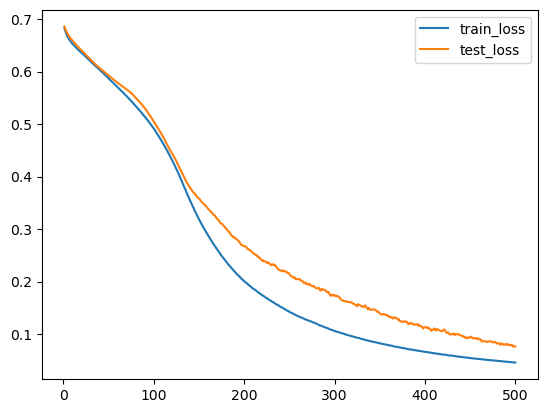

In [107]:
plt.plot(range(1,501),history.history["loss"],label="train_loss")
plt.plot(range(1,501),history.history["val_loss"],label="test_loss") 
plt.legend() 

#### amking predictions using the model 

In [109]:
predicted=model.predict(X_test)
predicted

1/1 [==============================] - 0s 39ms/step


array([[9.9987972e-01],
       [4.2919908e-02],
       [9.2538238e-01],
       [9.3973500e-01],
       [1.8234852e-03],
       [6.2433758e-04],
       [9.9995673e-01],
       [1.5925780e-03],
       [9.9642342e-01],
       [9.9989790e-01],
       [1.7158752e-03],
       [1.8720130e-02],
       [2.5721963e-03],
       [7.4652886e-01],
       [3.2931359e-03],
       [5.2747285e-01],
       [9.9993968e-01],
       [9.3227953e-01],
       [1.6392183e-03],
       [1.0399936e-03],
       [1.0182778e-01],
       [8.6985715e-03],
       [9.9963456e-01],
       [9.9977958e-01],
       [9.9942297e-01]], dtype=float32)

In [110]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

#### evaluating the model

1.0


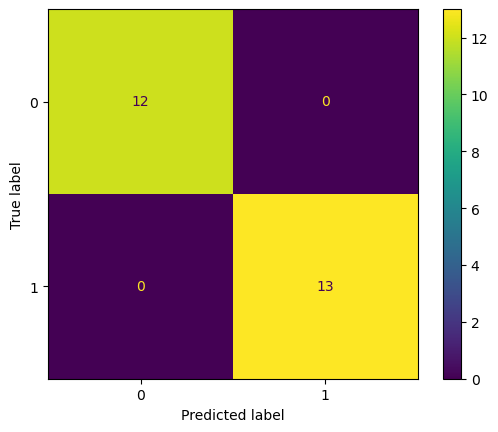

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### plotting the decision surface 

In [112]:
from mlxtend.plotting  import plot_decision_regions


9600/9600 [==============================] - 19s 2ms/step


<Axes: >

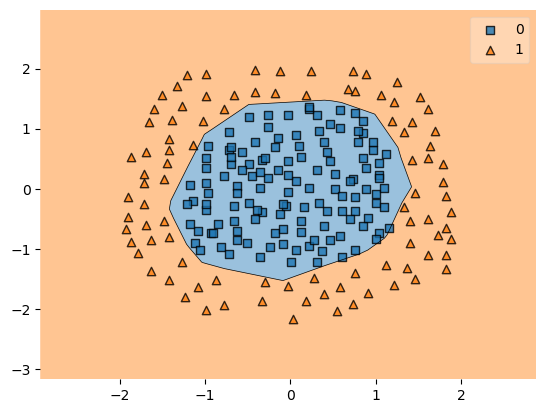

In [113]:
plot_decision_regions(X_train,y_train.values,clf=model)

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

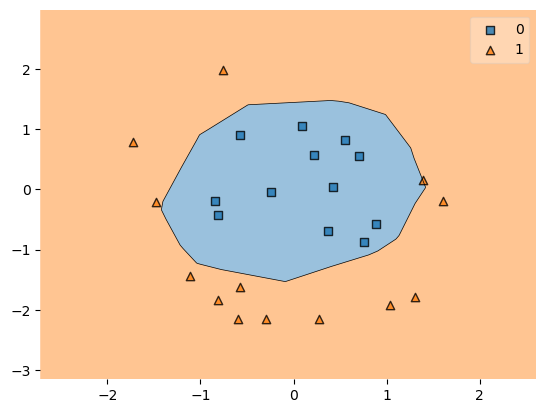

In [114]:
#for test data 
plot_decision_regions(X_test,y_test.values,clf=model)

#### Model Summary


- This neural network model is showing accuracy of 100 percent
- We have used 2 hidden layers.
- In the First Hidden layers we have used 8 neurons and activation function as relu .
- In the second hidden layers we have used 8 neuronsand activation function as relu .
- In the output layer we have used sigmoid as the activation function. 
- For compiling the model we haved loss as binary cross entropy,optimizer as SGD with batch size of 10 with learning rate of 0.01. 
- No of epochs used for training this model is 500.